# Hybrid Classic-Quantum Systems - Second Assignment #

You should fill in this Jupyter notebook in order to complete the assignment. Here a small recap of the rules:

* You should **NOT** modify the functions that are already provided in the notebook, unless it is strictly necessary;
* If you want to modify the given functions, please, provide an explanation of why you had to;
* You can define new functions, as soon as they are well commented;
* You can import all libraries you want, as soon as you justify their utilization;
* You can add new cells, as soon as you do not remove the cells where you are supposed to comment your solution;
* You are supposed to work by yourself - **plagiarism will not be tolerated**;
* Your solution should be commented and accompanied by a small description - you can add additional cells if needed;
* For any issue and doubt, please do not hesitate to use the forum or to write me an email.


## Exercise 1: Classic K-Means (25 points) ##
The first task you have to do for the assignment is the implementation of a classic version of k-means. This version will be used as a reference for your next exercises.

Some useful references:
* https://en.wikipedia.org/wiki/K-means_clustering
* NumPy reference: https://numpy.org/doc/stable/reference/
* Matplotlib reference: https://matplotlib.org/

### Creation of the dataset ###
We create a simple multiclass dataset with normally distributed clusters of points. To do this, we use the *make_blobs* function from *scikit-learn*

In [1]:
from sklearn.datasets import make_blobs
import numpy as np

def create_dataset(number_of_points, number_of_centers):
    data = make_blobs(n_samples=number_of_points, n_features=2, centers=number_of_centers, cluster_std=2, random_state=100)
    points = np.array(data[0])
    centers = np.array(data[1])
    
    return data, centers

dataset, centers = create_dataset(100,4)

### Normalize Input Points ###
We need to rescale the input in a specific interval.

In [2]:
import numpy as np

def preprocess(data_points):
    data_p = np.array(data_points[0])
    n = len(data_p)
    print(n)
    x = 30.0 * np.sqrt(2)
    for i in range(0,n):
        data_p[i][:] += 15
        data_p[i][:] /= x
        
    return data_p

### Plot points ###

We can use this function to plot the points in the space during algorithm execution.

In [3]:
import matplotlib.pyplot as plt 

def draw_plot(points,centers,label=True):
    if label==False:
        plt.scatter(points[:,0], points[:,1])
    else:
        plt.scatter(points[:,0], points[:,1], c=centers, cmap='viridis')
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.show()

### Plot Centroids ###
You can use this function to check the update of the centroids.

In [4]:
def plot_centroids(centers):
    plt.scatter(centers[:,0], centers[:,1])
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.show()

### Initialize Centroids ###
The first step of the algorithm is to initialize the centroids in the space, that will be updated in further iterations of the algorithm.

In [5]:
import random # gives methods to generate random numbers

"""
    Initialize the centroids by picking k random centroids between the points of the dataset.

    Parameters:
        points: the dataset
        k: the number of clusters

    Returns:
        Array with the centroids
"""
def initialize_centroids(points, k):
    min_val, max_val = np.min(points, axis=0), np.max(points, axis=0)
    centroids = [random.uniform(min_val, max_val) for _ in range(k)]
    return np.array(centroids)

Just as described on the Wikipedia page, we can initiate centroids using the Forgy method by randomly selecting K points within the dataset's domain. This straightforward implementation should suffice, as the centroids will be subsequently updated at each step of the algorithm. Alternatively, an approach could involve selecting k points directly from the dataset instead of employing `uniform()` to choose any point within the domain. However, this method appeared overly restrictive, particularly in the context of unbalanced datasets.

### Find nearest neighbors ###
Now we need to find the closest center for each point. This computation depends on the distance function that we want to use.

In [6]:
"""
    Distance function between points and centroids based on the euclidean distance.

    Parameters:
        points: the points of the dataset
        centroids: the centroids of the clusters

    Returns:
        Array with the distances between each point and each centroid
"""
def dist_func(points, centroids):
    # Reshape points and centroids arrays to ensure proper broadcasting
    points = points.reshape((points.shape[0], 1, points.shape[1]))
    centroids = centroids.reshape((1, centroids.shape[0], centroids.shape[1]))

    # Compute Euclidean distances
    distances = np.sqrt(np.sum((points - centroids)**2, axis=2))

    return distances

"""
    Assign each point to the closest centroid, based on the given distance function.

    Parameters:
        points: the points of the dataset
        centroids: the centroids of the clusters
        dist_func: the distance function to use

    Returns:
        Array with the indices of the closest centroid for each point
"""
def find_nearest_neighbour(points, centroids, dist_func):
    distances = dist_func(points, centroids)
    return np.argmin(distances, axis=1)

The approach involves employing the Euclidean distance as the distance metric and subsequently associating each point with its nearest centroid.

Within the `dist_func()` implementation, the `reshape()` method streamlines the application of the Euclidean distance computation between all points and centroids. The remainder of the process is quite straightforward.

In the `find_nearest_neighbour()` function, the distance function is invoked, and `argmin()` is utilized to obtain the indices of centroids with the minimum distance to all points.

### Find centroids ###
Finally, we update centroids based on the nearest centers for each point.

In [7]:
"""
    Takes the points and the centroids and returns the new centroids based on the mean of the points assigned to each centroid.

    Parameters:
        points: array containing arrays of points according to each centroid
        centers: array containing the centroids

    returns:
        Array containing the new centroids
"""
def find_centroids(points, centers, stat_func=np.mean):
    new_centers = [stat_func(points[i], axis=0) for i in range(len(centers))]
    # Check if there are any NaN values in the new centers, caused by empty clusters
    for i in range(len(new_centers)):
        if np.isnan(new_centers[i]).any():
            new_centers[i] = centers[i]
    return np.array(new_centers)

The strategy for determining the updated centroids based on the previously assigned points involves taking the points corresponding to each centroid and computing their mean. This mean value is then set as the new centroid.

In this context, it is assumed that the parameter `points` is an array comprising k lists, each representing the points associated with a specific centroid. We should also take into consideration the possibility of a cluster not having any points, which could result in undefined behaviour. In this case, we use the previous centroid.

### Main k-means loop ###

100


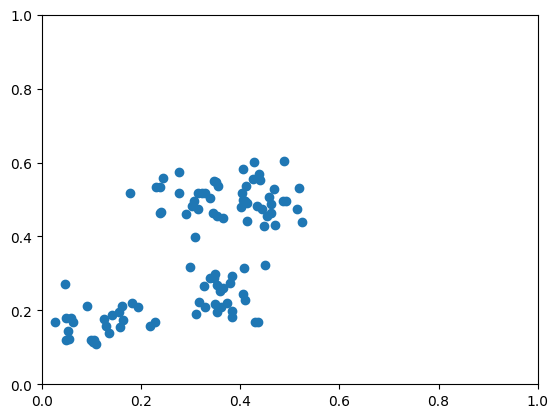

Time taken: 0.0025756359100341797 seconds


/home/brosendo/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/brosendo/.local/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


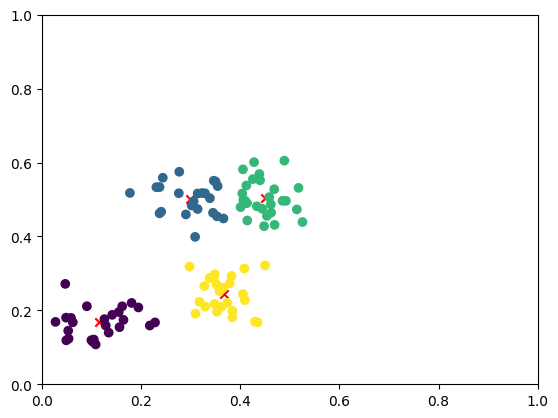

In [8]:
import time

n = 100  # number of data points
k = 4  # Number of centers


points, o_centers = create_dataset(n, k)  # dataset
points = preprocess(points)  # Normalize dataset

plt.figure()
draw_plot(points, o_centers, label=False)

start_time = time.time()

centroids = initialize_centroids(points, k)  # Intialize centroids

# run k-means algorithm
previous_centroids = None
while not np.array_equal(centroids, previous_centroids):
    previous_centroids = centroids
    closest = find_nearest_neighbour(points, centroids, dist_func)
    points_per_centroid = [points[closest == i] for i in range(len(centroids))]
    centroids = find_centroids(points_per_centroid, centroids)

print("Time taken: %s seconds" % (time.time() - start_time))

plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", color="r")
centroids_per_point = [closest[i] for i in range(len(points))]
draw_plot(points, centroids_per_point, label=True)

The approach involves iterating until the previous centroids match the new ones, indicating we have reach the final clusters. The steps within each iteration are as follows:
- Preserve the current centroids (stored in the `previous_centroids` variable).
- Determine the nearest neighbor centroid for each point.
- Create the `points_per_centroid` variable and compute the new centroids.

Ultimately, the clusters can be visualized by plotting them with their respective colors. The final centroids are marked with a red 'X', and each cluster is also assigned a different color.

### Bonus question ###
* Modify your implementation into k-medians.
* Compare the results for the two algorithms: can you see any difference?
**ADD MORE CELLS BELOW TO ANSWER THESE QUESTIONS**

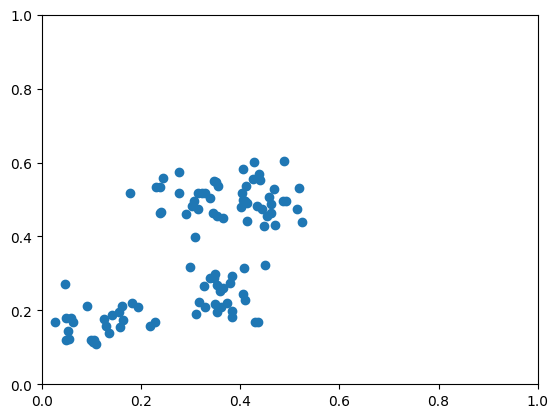

Time taken: 0.0014507770538330078 seconds


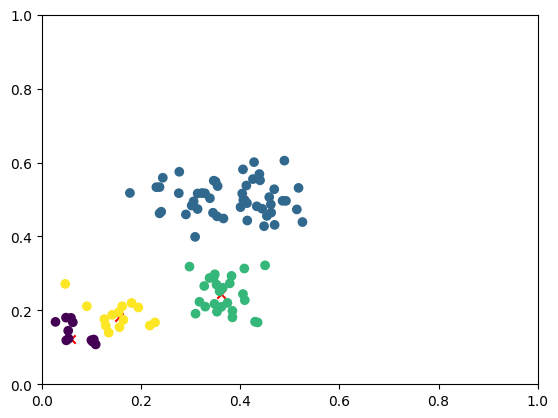

In [9]:
# All the variables were already defined in the previous cell, so we can just run the algorithm again

plt.figure()
draw_plot(points, o_centers, label=False)

start_time = time.time()

centroids = initialize_centroids(points, k)  # Intialize centroids

# run k-medians algorithm
previous_centroids = None
while not np.array_equal(centroids, previous_centroids):
    previous_centroids = centroids
    closest = find_nearest_neighbour(points, centroids, dist_func)
    points_per_centroid = [points[closest == i] for i in range(len(centroids))]
    centroids = find_centroids(points_per_centroid, centroids, stat_func=np.median)

print("Time taken: %s seconds" % (time.time() - start_time))

plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", color="r")
centroids_per_point = [closest[i] for i in range(len(points))]
draw_plot(points, centroids_per_point, label=True)

#### Modify your implementation into k-medians.

To initiate the k-medians implementation, the first step involved a slight modification to the `find_centroids` function. An additional parameter, `stat_func`, was introduced to allow the optional inclusion of a different function in place of the mean. Subsequently, a loop identical to the previous one was created, with the sole distinction being the use of this new parameter.

It's worth noting that the loop could have been refactored into a separate function to prevent code duplication. However, this was not done as the assignment specifically instructed the implementation of the loop in the provided cell above.

#### Compare the results for the two algorithms: can you see any difference?

Upon examining the plots generated from the given example data, the results obtained by the two algorithms exhibit considerable similarity. Notably, the only difference is the consolidation of the two top clusters into a single cluster, and the division of the leftmost cluster into two distinct clusters. The introduction of a new statistical function naturally introduces some variations, particularly given the dataset's inherent tendency toward a more balanced distribution with three clusters. When utilizing four clusters, the optimal placement for the fourth cluster becomes ambiguous.

## Exercise 2: Quantum K-Means (45 points) ##
Now you have to modify your implementation of k-means and move some of the component on quantum.

### Encoding ###
First step is to find out the best encoding for the input data points.
References about data encoding:
* Weigold et al., "Data encoding patterns for quantum computing" (https://dl.acm.org/doi/10.5555/3511065.3511068)
* P. Niemann, R. Datta, and R. Wille, Logic Synthesis for Quantum State Generation, IEEE 46th International Symposium on Multiple-Valued Logic, Springer (2016) pp. 247-252. (https://ieeexplore.ieee.org/abstract/document/7515556)
* M. Mttnen, J. Vartiainen, V. Bergholm, and M. M. Salomaa, Transformation of quantum states using uniformly controlled rotations, Quantum Information and Computation, 5 (2005) pp. 467-473. (https://dl.acm.org/doi/abs/10.5555/2011670.2011675)

In [10]:
import math
import numpy as np
from qiskit.quantum_info import Statevector

"""
    Encode a point into an angle, for amplitude encoding.

    Parameters:
        point: the point to encode
    
    Returns:
        Statevector of the encoded point
"""


def encode(point):
    # check if len(normalized_point) is a power of 2 and pad with 0s if not
    if not math.log2(len(point)).is_integer():
        new_dim = 2 ** math.ceil(math.log2(len(point)))
        point = np.pad(point, (0, new_dim - len(point)))

    return Statevector(point)

Just as explained in Weigold's article, amplitude encoding usually works well when a numerical input data vector must be encoded for an algorithm. This way, we can transform a point (with any number of dimensions) into an angle, which will then be used in a quantum circuit in the form of amplitude encoding.

This should prove useful when implementing the quantum version of the k-means algorithm, since it allows us to encode a point with any number of features (dimensions).

Our example only contains 2 dimensions (`x` and `y`) but we can generalize the encoding function to take any number of dimensions. In this case, we need to take into consideration that a vector space of an n qubit register has dimension 2<sup>n</sup>. If this is not the case, the input vector can be padded with additional zeros.

In this implementation, the `Statevector` class is used to store the amplitudes corresponding to the point. It can later be used to construct quantum circuits.

### Identify which tasks can be executed on quantum devices ###
In this part, you should describe which part of the computation be executed on quantum devices. For each task, you should
* Identify the corresponding algorithm
* Provide a possible design for each algorithm, including possible data encoding

#### Distance Function

In the traditional k-means algorithm, the distance between a given point and a centroid is determined using the **Euclidean distance**. It's important to note that the number of dimensions in the input data vectors is arbitrary, represented by N features in the algorithm. Consequently, the Euclidean distance exhibits linear complexity, O(N), causing the execution time of k-means to increase with the number of features utilized.

In the quantum version of k-means, we can capitalize on this observation by estimating the proximity between two points in **constant time, O(1)**, regardless of the number of features employed. This is achieved through the use of the **swap test** to compare distances among data points.

In the swap test circuit for the quantum version of k-means, an auxiliary qubit (ancilla) is utilized, along with two N-sized vectors:

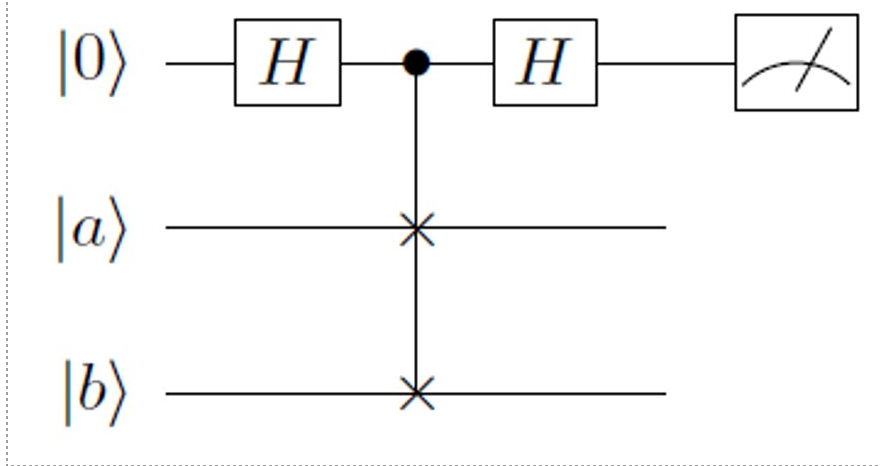

The resulting quantum state of this circuit is illustrated below:

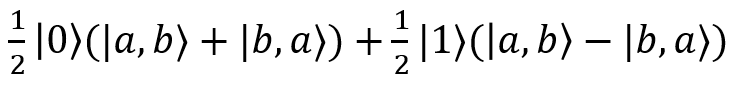

The probability of the ancilla qubit being 1 for this state is determined by the formula:

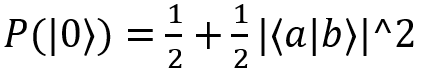

This formula already has some correlation with the Euclidean distance. A probability of 0.5 means the vectors are orthogonal, while a probability of 1 means they are identical. With a few modifications to our data points, we can use this test to properly estimate their distance!

After encoding the data points using the previously defined function, we can establish two states as follows and employ the swap test to assess their overlap. If the vectors are already normalized, Z will be equal to 2.

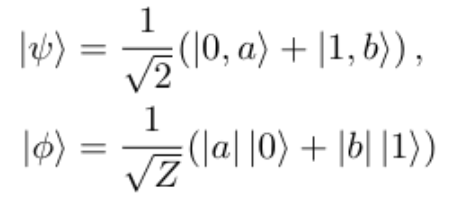

Consequently, the square of the distance between the data points is directly proportional to the probability yielded by the swap test. This allows us to utilize the swap test result for estimating the Euclidean distance between the points. Notably, the algorithm's complexity is O(1) since we exclusively measure the auxiliary qubit.

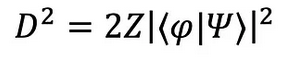

Note: An alternative, and possible more pratical, approach is detailed in one of [Qiskit's tutorials](https://github.com/CQCL/qiskit-tutorial/blob/master/community/awards/teach_me_qiskit_2018/quantum_machine_learning/1_K_Means/Quantum%20K-Means%20Algorithm.ipynb) available on GitHub. However, it is not implemented in this notebook.

Some images presented were extracted from the class's slides and this [Medium article](https://medium.com/qiskit/calculate-quantum-euclidean-distance-with-qiskit-df85525ab485).

#### Finding Nearest Neighbour

After obtaining the distances of all points from the centroids, the subsequent step involves identifying the minimum distance for each point. This constitutes a typical minimization problem, which, in its classical form, exhibits linear complexity, O(N). To address this, Grover's algorithm can be employed to find the minimum input value, just like it was originally proposed by Dürr and Høyer.

In the quantum version (GroverMin), the strategy is to establish an initial threshold and iterate as follows:
- Apply Grover's algorithm with the current threshold, marking all elements below it.
- Set a new threshold

This iteration should require log<sub>2</sub>(N) steps. Given Grover's algorithm's complexity of O($\sqrt[]{N}$), the overall complexity becomes **O($\sqrt[]{N}$ log(N))**, offering an improvement over the linear complexity observed in the classical version.

In the context of our k-means example, the approach involves initializing a quantum register with a sufficient number of qubits to represent all points in the dataset, utilizing the encoding function established earlier. Subsequently, a second register is required to store the threshold, employing the same encoding method.

Regarding Grover's algorithm, detailed explanations and implementations are widely available online (e.g., [IBM](https://learning.quantum.ibm.com/course/fundamentals-of-quantum-algorithms/grovers-algorithm)). Therefore, this notebook will solely introduce the general function:

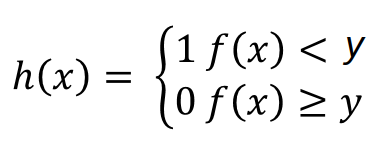

### Implement quantum tasks ###
In the next cells, you should implement **AT LEAST ONE** identified quantum tasks. For the ones you do not implement, you should justify why you decided to not implement it in quantum version. Justification can be related to the limit of available quantum hardware. Add as many cells you need for your code and describe your implementation. 

The suggested quantum algorithm for identifying the **nearest neighbor** for each point necessitates the initialization of a register containing sufficient qubits to represent all dataset points. Given that the k-means algorithm typically processes a large number of points, achieving this on current quantum machines is evidently impractical. To accommodate a practical number of points and features, hundreds of qubits would likely be required, a capability not presently attainable in existing hardware.

For this reason, the quantum task to be implemented will be the **distance function**. Given that the input scales only with the number of features, deploying this algorithm on an actual quantum machine becomes significantly more practical, particularly in our case where only two features/dimensions are utilized.

In [12]:
# Constants used internally by the algorithm
QUANTUM_BACKEND = "qasm_simulator"
N_SHOTS = 1000
REAL_BACKEND = None

In [13]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer
from qiskit.extensions import Initialize

"""
    Performs the swap test between two vectors and returns the probability of the ancilla being in the |0> state.

    Parameters:
        v1: the first vector
        v2: the second vector
    
    Returns:
        Probability of the ancilla being in the |0> state
"""


def swap_test(v1: Statevector, v2: Statevector, backend_name=QUANTUM_BACKEND):
    if v1.num_qubits != v2.num_qubits:
        print("Error: vectors must have the same number of qubits")
        return

    # Initialize registers and circuit
    vector_length = v1.num_qubits
    ancilla_reg = QuantumRegister(1)
    first_reg, second_reg = QuantumRegister(vector_length), QuantumRegister(
        vector_length
    )
    classic_reg = ClassicalRegister(1)

    circuit = QuantumCircuit(ancilla_reg, first_reg, second_reg, classic_reg)

    # Initialize vector amplitudes
    initializer1 = Initialize(v1)
    initializer2 = Initialize(v2)

    circuit.append(initializer1, first_reg)
    circuit.append(initializer2, second_reg)

    # Apply Hadamard gate to ancilla and
    circuit.h(ancilla_reg[0])

    # Apply controlled swap gates
    for i in range(vector_length):
        circuit.cswap(ancilla_reg[0], first_reg[i], second_reg[i])

    # Apply Hadamard gate to ancilla
    circuit.h(ancilla_reg[0])

    # Measure ancilla
    circuit.measure(ancilla_reg, classic_reg)

    # Execute circuit
    if REAL_BACKEND is None:
        backend = Aer.get_backend(backend_name)
    else:
        backend = REAL_BACKEND
    job = execute(circuit, backend, shots=N_SHOTS)

    # Get results and calculate probabilty of |0>
    counts = job.result().get_counts()
    return counts["0"] / N_SHOTS


"""
    Quantum version of the distance function between two points, based on the swap test.

    Parameters:
        x: the first point
        y: the second point

    Returns:
        Distance between the two points
"""


def quantum_dist(x, y, backend_name=QUANTUM_BACKEND):
    # Encode points
    x_vector = encode(x)
    y_vector = encode(y)

    # Calculate psi and phi
    psi = (
        x_vector.expand(Statevector.from_label("0"))
        + y_vector.expand(Statevector.from_label("1"))
    ) / np.sqrt(2)
    psi = psi / np.linalg.norm(psi.data)

    Z = np.linalg.norm(x_vector.data) ** 2 + np.linalg.norm(y_vector.data) ** 2
    phi = np.zeros(psi.data.size)
    phi[0] = np.linalg.norm(x_vector.data) / np.sqrt(Z)
    phi[phi.size - 1] = np.linalg.norm(y_vector.data) / np.sqrt(Z)
    phi = Statevector(phi)

    # Perform swap test
    prob = swap_test(psi, phi, backend_name=backend_name)
    distance = math.sqrt(4 * Z * (prob - 0.5))

    return distance


"""
    Quantum version of the distance function between points and centroids, based on the swap test.

    Parameters:
        points: the points of the dataset
        centroids: the centroids of the clusters

    Returns:
        Array with the distances between each point and each centroid
"""


def quantum_dist_func(points, centroids):
    distances = [
        [quantum_dist(point, centroid) for centroid in centroids] for point in points
    ]
    return np.array(distances)

In [14]:
"""
    Quantum version of the find_nearest_neighbour function.

    Parameters:
        points: the points of the dataset
        o_centers: the original centers of the clusters
        k: the number of clusters
        stat_func: the function to use to calculate the new centroids (e.g. mean, median)
"""
def quantum_k_means(points, o_centers, k=4, stat_func=np.mean):
    plt.figure()
    draw_plot(points, o_centers, label=False)

    start_time = time.time()

    centroids = initialize_centroids(points, k)  # Intialize centroids

    # run k-means algorithm
    previous_centroids = None
    while not np.array_equal(centroids, previous_centroids):
        previous_centroids = centroids
        closest = find_nearest_neighbour(points, centroids, quantum_dist_func)
        points_per_centroid = [points[closest == i] for i in range(len(centroids))]
        centroids = find_centroids(points_per_centroid, centroids, stat_func=stat_func)
        print("Iteration over")

    print("Time taken: %s seconds" % (time.time() - start_time))

    plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", color="r")
    centroids_per_point = [closest[i] for i in range(len(points))]
    draw_plot(points, centroids_per_point, label=True)

### Compare executions ###
Execute both classic and quantum version of k-means and compare results. Add as many cells you need to run your code, describe your implementation and comment your results. 

Initially, the primary loop of the classical and quantum k-means underwent a modification to include information about the execution time. In the given example, the algorithm took **1.45 milliseconds for the classical version**. As for the quantum version, we get:
- **3 minutes 15 seconds** when running on a simulator.
- **For each job** (distance calculation) executed on the real IBM Quantum machine, *ibm_brisbane*, the processing time is approximately **2 seconds**. However, due to a high volume of jobs and extended queue durations (often lasting 1 hour per job), totally executing the algorithm becomes challenging.
- Notably, the classical version of the algorithm completes within a few milliseconds, rendering the classical aspects of the quantum version negligible. To estimate the quantum algorithm's execution time, considering 100 points, 4 centroids, and 7 iterations performed by the simulator, we calculate **2 * 100 * 4 * 7 = 5600s = 1h 33m 20s**. However, this value appears impossible as it significantly exceeds the simulator's runtime. This discrepancy suggests that IBM-Q might not be providing precise execution times for each job.

While the implementation tried to follow the quantum distance algorithm as faithfully as possible, the outcomes were less satisfactory when compared to the classical counterpart. As shown in the plot, the final centroids for this example are in close proximity, and a majority of points are assigned to a single cluster.

Regarding the execution time, it was anticipated that the simulator would require significantly more time than its classical counterpart. However, the real machine's execution time also proved to be considerable. Besides some doubts regarding IBM-Q's execution times, this is presumably attributed to the substantial duration required for state preparation each time the distance between two points needs to be measured, a process that occurs frequently.

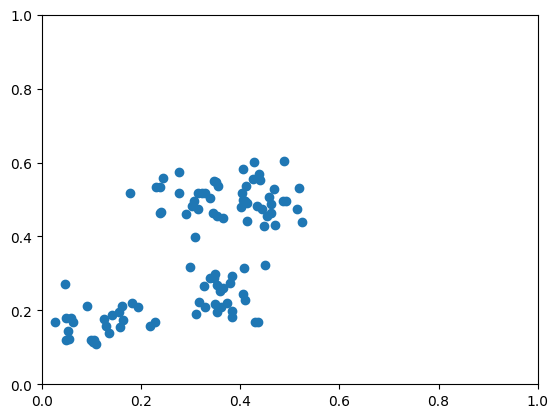

Iteration over
Iteration over
Iteration over
Iteration over
Iteration over
Iteration over
Iteration over
Time taken: 194.9251890182495 seconds


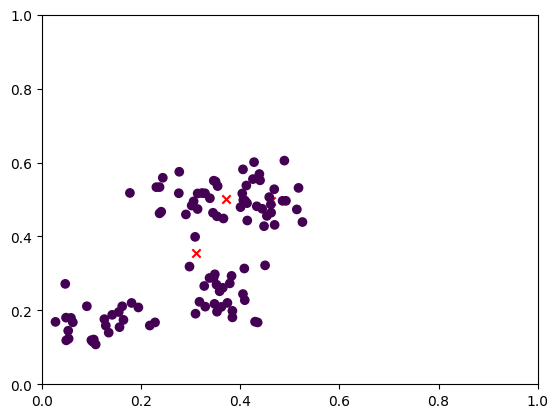

In [16]:
# Run the quantum k-means algorithm in a simulator with default values (k=4, mean as statistic function)
quantum_k_means(points, o_centers)

/tmp/ipykernel_6328/3819968129.py:6: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  IBMQ.save_account(
/tmp/ipykernel_6328/3819968129.py:6: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.save_account(


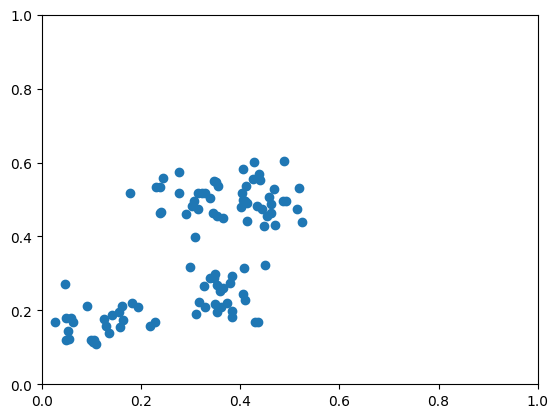

In [92]:
# ONLY RUN THIS CELL IF YOU WANT TO RUN THE ALGORITHM IN A REAL MACHINE

from qiskit import IBMQ

# load account, the API key is a placeholder
IBMQ.save_account(
    "8e4022fa39392c938f54b38a2f44c291fe7deb86254b626564b5ee0cff0ab4f2d4be8563eed43c9a58d36372f3c5be22ccfd2f8a0141fd230fd13d1392503f5d",
    overwrite=True,
)
IBMQ.load_account()

provider = IBMQ.get_provider(hub="ibm-q")
# print(provider.backends())
backend = provider.get_backend("ibm_brisbane")

# Run the quantum k-means algorithm in a real machine with default values (k=4, mean as statistic function)
REAL_BACKEND = backend
quantum_k_means(points, o_centers)
REAL_BACKEND = None

### Bonus question (15 points) ### 
* What would you need to change to implement the k-medians?
* Are there additional quantum tasks that you can have if you implement k-medians?

#### What would you need to change to implement the k-medians?

Given that we've been executing the classical version of the mean, transitioning to a quantum adaptation of k-medians is a breeze. The switch involves a straightforward adjustment in the function used for selecting a new centroid, mirroring the process employed in the classical k-medians. With the `quantum_k_means` function already geared up for this task, all that's required is to provide it with an additional parameter.

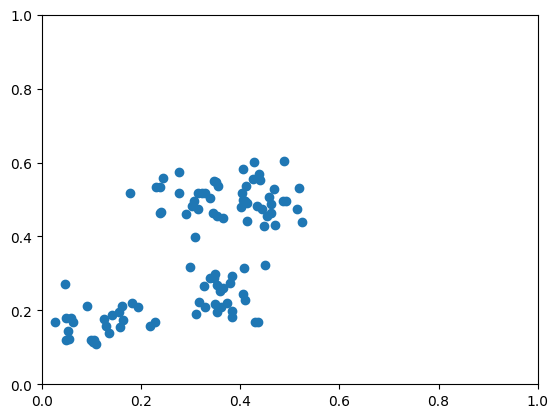

Iteration over
Iteration over
Iteration over
Iteration over
Iteration over
Iteration over
Time taken: 169.30450534820557 seconds


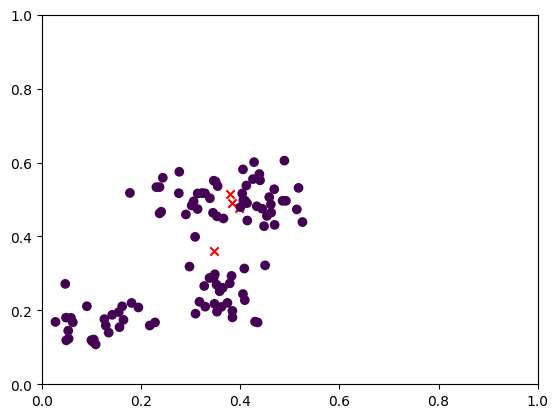

In [15]:
# Run the quantum k-medians algorithm with 4 clusters on a simulator
quantum_k_means(points, o_centers, stat_func=np.median)

#### Are there additional quantum tasks that you can have if you implement k-medians?

Indeed, with the median being used instead of the mean, the quantum version can leverage the quantum median algorithm to determine the new centroids. The quantum advantage stems from the fact that the median represents the point with the minimum distance to all other points.

The algorithm proceeds as follows:
1. Utilize the distance calculation, employing the swap test as explained earlier, to compute all required distances.
2. Store the distances in a classical register.
3. Apply GroverMin (as detailed previously) to identify the smallest distance.

However, despite the feasibility of this task on a quantum machine, the practical benefits may be limited. According to NumPy's documentation, `np.mean` employs the [Introselect](https://en.wikipedia.org/wiki/Introselect) algorithm (a variant of [Quickselect](https://en.wikipedia.org/wiki/Quickselect)) with an average time complexity of O(N). In contrast:
- The distance calculation, although achievable in O(1), necessitates computation for every pair of points within each centroid, resulting in a time complexity of O(N) (possibly in a classical machine, as explained [here](https://www.geeksforgeeks.org/product-of-all-the-pairs-from-the-given-array/)).
- As demonstrated earlier, GroverMin has a time complexity of O($\sqrt[]{N}$ log(N)). While this is better than the distance calculation's complexity, the previous step doesn't improve the efficiency of Introselect.

In summary, the quantum version of the median proves advantageous only when implementing the classical median involves sorting the vector first. Given the availability of Introselect, the classical version is preferred as it avoids the encoding and state preparation steps, while also excluding potential noise from current quantum hardware. Note that the number of required qubits for the GroverMin would also be too large to be feasible.

## Exercise 3: Quantum SVM (30 points) ##
In this exercise, you will apply quantum SVM to perform some basic classification task. You should perform training and evaluation for one of the selected datasets. Bonus points (up to 15) will be awarded if you perform dataset preprocessing.

### Data analysis with Quantum SVM ###

In [30]:
from sklearn.datasets import load_iris, load_wine, load_breast_cancer
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from qiskit.primitives import Sampler
from qiskit_algorithms.state_fidelities import ComputeUncompute
from qiskit_machine_learning.algorithms import QSVC
from qiskit.circuit.library import ZZFeatureMap, ZFeatureMap, PauliFeatureMap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import time
import numpy as np

In [52]:
random_seed = 42  # Use this seed to make sure the results are reproducible

"""
    Loads and preprocesses the dataset, splitting it into training and test sets.
"""
def preprocess(dataset_loader=load_iris):
    dataset = dataset_loader()
    features = dataset.data
    labels = dataset.target

    # Check if there are any NaN values in the features
    if np.isnan(features).any():
        print("There are NaN values in the features, replacing them with 0s")
        features = np.nan_to_num(features)
    else:
        print("There are no NaN values in the features")
    
    # Check if there are any NaN values in the labels
    if np.isnan(labels).any():
        print("There are NaN values in the labels, replacing them with 0s")
        labels = np.nan_to_num(labels)
    else:
        print("There are no NaN values in the labels")

    # Normalize the features
    scaler = StandardScaler()
    features = scaler.fit_transform(features)

    print("Amount of features: {}".format(len(features[0])))
    print("Amount of data: {}".format(len(features)))

    return train_test_split(features, labels, test_size=0.2, random_state=random_seed)

The preprocessing step is common for both classical and quantum algorithms. Fortunately, datasets from scikit-learn are inherently clean and well-prepared. The overall process is outlined through the following steps:

1. Load the data using scikit-learn.
2. Check for any invalid values in the features or labels. If found, replace them with zeros.
3. Apply scikit-learn's standard scaler to transform the features, resulting in significantly improved accuracy.
4. Since the datasets are already well-labeled, label encoding, which wouldn't impact the results, is skipped.
5. Split the features and labels into training and testing datasets, allocating 20% for testing.

Note: Dimensionality reduction is intentionally omitted, as all datasets run efficiently on the classical algorithm, and a functional example for the quantum algorithm is already in place.

In [53]:
train_features, test_features, train_labels, test_labels = preprocess(load_iris)

There are no NaN values in the features
There are no NaN values in the labels
Amount of features: 4
Amount of data: 150


In [5]:
"""
    Runs the quantum SVM algorithm on the given dataset. Prints the execution time and the accuracy.

    Parameters:
        train_features: the training features
        test_features: the test features
        train_labels: the training labels
        test_labels: the test labels
        feature_map: the feature map to use (defaults to ZZFeatureMap with 2 repetitions)
"""
def quantum_svm(
    train_features, test_features, train_labels, test_labels, feature_map=None
):
    # Initialize feature map, kernel and QSVC
    if feature_map is None:
        feature_map = ZZFeatureMap(feature_dimension=len(train_features[0]), reps=2)
    fidelity = ComputeUncompute(sampler=Sampler())
    kernel = FidelityQuantumKernel(feature_map=feature_map, fidelity=fidelity)
    qsvc = QSVC(quantum_kernel=kernel)

    # Run the algorithm, score and measure execution time
    start_time = time.time()
    qsvc.fit(train_features, train_labels)
    score = qsvc.score(test_features, test_labels)

    # Print the execution time and accuracy
    print("Time taken: %s seconds" % (time.time() - start_time))
    print("Score: {}".format(score))

In [50]:
# Run the quantum SVM algorithm with the default feature map (ZZFeatureMap)
quantum_svm(train_features, test_features, train_labels, test_labels)

Time taken: 49.324686765670776 seconds
Score: 0.7666666666666667


Following the methodologies outlined in the classes and [Qiskit](https://github.com/qiskit-community/qiskit-machine-learning/blob/main/docs/tutorials/03_quantum_kernel.ipynb), the quantum SVM is executed through the following steps:

- Create a feature map, intended for later use by the kernel to encode the data.
- Instantiate the `ComputeUncompute` object, which serves as fidelity between states for the kernel.
- Establish a quantum kernel, `FidelityQuantumKernel`, supplying it with the feature map and fidelity object.
- Create an instance of `QSVC`, taking the kernel as input, and proceed to train the model.
- Lastly, determine the model's accuracy by executing it against the test data.

### Try different Feature Maps ###
Check the results of your model by training with different Feature Maps. Which one gives the best results?

In [34]:
# Run the quantum SVM algorithm with the ZFeatureMap
quantum_svm(train_features, test_features, train_labels, test_labels, feature_map=ZFeatureMap(feature_dimension=len(train_features[0]), reps=2))

Time taken: 18.0530104637146 seconds
Score: 0.9333333333333333


In [51]:
# Run the quantum SVM algorithm with the PauliFeatureMap
quantum_svm(train_features, test_features, train_labels, test_labels, feature_map=PauliFeatureMap(feature_dimension=len(train_features[0]), reps=2))

Time taken: 50.114342212677 seconds
Score: 0.7666666666666667


### Compare with classic SVM ###
Compare your results with classic SVM.

In [46]:
from sklearn.svm import SVC

svc = SVC(random_state=random_seed)
start_time = time.time()
svc.fit(train_features, train_labels)
score = svc.score(test_features, test_labels)

# Print the execution time and accuracy
print("Time taken: %s seconds" % (time.time() - start_time))
print("Classical SVM accuracy:", score)

Time taken: 0.0035550594329833984 seconds
Classical SVM accuracy: 0.9736842105263158


The approach for the classical SVM involves using the standard function `SVC` from the sklearn library. The methodology includes an initial division of the dataset into training and testing sets, followed by training the algorithm with the former. Subsequently, the model's accuracy is computed, facilitating a comparison with its quantum counterpart.

After executing all versions of SVM (classical and quantum with three different feature maps), we can compare their accuracy and execution times. It's important to note that the classical version will consistently run much faster, given the use of a quantum simulator. In these experiments, only the **iris** dataset successfully ran on the quantum simulator. For the other datasets, Python's kernel eventually ran out of memory and crashed after 10 to 20 minutes.


##### Accuracy scores

|                     | **load_iris** | **load_wine** | **load_breast_cancer** |
|---------------------|---------------|---------------|------------------------|
| **Classical SVM**   | 100%       |     100%      |        97.4%      |
| **PauliFeatureMap** | 77.7%       |      X        |          X            |
| **ZFeatureMap**     | 93.3%       |      X       |           X          |
| **ZZFeatureMap**    | 77.7%       |     X      |          X         |

##### Execution times

|                     | **load_iris** | **load_wine** | **load_breast_cancer** |
|---------------------|---------------|---------------|------------------------|
| **Classical SVM**   | 3.81 ms       |    4.62 ms       |     3.6 ms                |
| **PauliFeatureMap** | 49.32 s       |    X         |          X          |
| **ZFeatureMap**     | 18.05 s       |     X      |            X         |
| **ZZFeatureMap**    | 50.11 s       |    X       |          X           |

Even when disregarding the performance impact of running the algorithm on a quantum simulator, the classical model still demonstrates higher accuracy. It appears that, for this particular use case, the quantum version fails to enhance our results.

Between the different feature maps, `ZFeatureMap` was clearly the best one for these experiments. The accuracy and performance of `ZZFeatureMap` and `PauliFeatureMap` were identical.